## 1.Import the necessary libraries.
## 2.Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
## 3.First look at its main features (head, shape, info).

In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
customer_df = pd.read_csv(r'C:\Users\Roberto\Documents\IronHack\Unit 4\Day_1\Morning\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv') 

In [4]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.shape

(9134, 24)

In [6]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor         

## 4.Rename the columns so they follow the PE8 (snake case).

In [8]:
new_columns = []
for i in customer_df.columns:
    i = i.lower().replace(' ', '_')
    new_columns.append(i)
    
customer_df.columns = new_columns
customer_df.columns


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
#def clean_heads(data):
#    data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')


## 5.Change effective to date column to datetime format.

In [11]:
customer_df.effective_to_date = pd.to_datetime(customer_df['effective_to_date'])


## 6.Check NaN values per column.

In [13]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [14]:
customer_df[customer_df == ' '].any()


customer                         False
state                            False
customer_lifetime_value          False
response                         False
coverage                         False
education                        False
effective_to_date                False
employmentstatus                 False
gender                           False
income                           False
location_code                    False
marital_status                   False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
policy_type                      False
policy                           False
renew_offer_type                 False
sales_channel                    False
total_claim_amount               False
vehicle_class                    False
vehicle_size                     False
dtype: bool

In [15]:
np.where(customer_df.applymap(lambda x: x == ''))  #show where are mepty in the dataframe

(array([], dtype=int64), array([], dtype=int64))

In [16]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [17]:
numerical = customer_df.select_dtypes(np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [18]:
numerical.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [19]:
categorical = customer_df.select_dtypes(object)

In [20]:
categorical.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

## 7.Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [22]:
continuous = 'customer_lifetime_value', 'income', 'monthly_preimum_auto', 'months_since_last_claim', 'months_since_policy_inception','total_claim_amount'
discrete = 'number_of_open_complaints','number_of_policies'


In [23]:
def numerical_types(df, types):
    num_discrete = []
    num_continuous = []
    num = df.select_dtypes(include=np.number)
    for i in num.columns:
        if 'number' in i:
            num_discrete.append(i)
        else:
            num_continuous.append(i)
    if types == 'discrete':
        x = num[num_discrete]
    else:
        x = num[num_continuous]
    
    
    return x

    
numerical_types(customer_df,'discrete')


,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [24]:
numerical_types(customer_df,'continues')


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


## 8.For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [26]:
categorical = customer_df.select_dtypes(object)

In [27]:
categorical.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [28]:
categorical.state.unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [29]:
categorical = customer_df.select_dtypes(include=np.object)
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [30]:
def get_unique_values(values):
    list_of_unique_values = []
    unique_values = set(values)
    for value in unique_values:
        list_of_unique_values.append(value)
    return list_of_unique_values

get_unique_values(customer_df.coverage)


['Premium', 'Basic', 'Extended']

In [31]:
#def renew_offer_type(x):
 #   if x == 'Offer4':
 #       return '4'
 #   elif x == 'Offer3':
 #       return '3'
  #  elif x == 'Offer2':
   #     return '2'
  #  else:
  #      return '1'


## 9.Get categorical features.

In [33]:
for column in categorical:
    if column != 'customer':
        cat_column = categorical[column]
        print(column)
        #print(cat_column.unique())
        print(set(cat_column))
        print('--')


state
{'Oregon', 'Arizona', 'Nevada', 'California', 'Washington'}
--
response
{'No', 'Yes'}
--
coverage
{'Premium', 'Basic', 'Extended'}
--
education
{'Master', 'Doctor', 'Bachelor', 'High School or Below', 'College'}
--
employmentstatus
{'Disabled', 'Medical Leave', 'Unemployed', 'Retired', 'Employed'}
--
gender
{'F', 'M'}
--
location_code
{'Rural', 'Urban', 'Suburban'}
--
marital_status
{'Single', 'Married', 'Divorced'}
--
policy_type
{'Corporate Auto', 'Special Auto', 'Personal Auto'}
--
policy
{'Personal L3', 'Special L1', 'Personal L1', 'Personal L2', 'Special L3', 'Corporate L3', 'Corporate L1', 'Corporate L2', 'Special L2'}
--
renew_offer_type
{'Offer2', 'Offer1', 'Offer4', 'Offer3'}
--
sales_channel
{'Web', 'Branch', 'Call Center', 'Agent'}
--
vehicle_class
{'Four-Door Car', 'Sports Car', 'SUV', 'Luxury Car', 'Two-Door Car', 'Luxury SUV'}
--
vehicle_size
{'Small', 'Large', 'Medsize'}
--


In [34]:
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [35]:
customer_df = customer_df.set_index('customer')
customer_df.head()


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Afternoon Lab

##  1 Import the necessary libraries if you are starting a new notebook.
## 2 Load the continuous and discrete variables into continuous_df and discrete_df variables.
## 3 Plot a correlation matrix, what can you see?
## 4 Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
## 5 What can you see in the plots?
## 6 Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
## 7 Have you found outliers? If you have, what should we do with them?

In [38]:
discrete_df = numerical_types(customer_df,'discrete')
continuous_df = numerical_types(customer_df,'continuous')


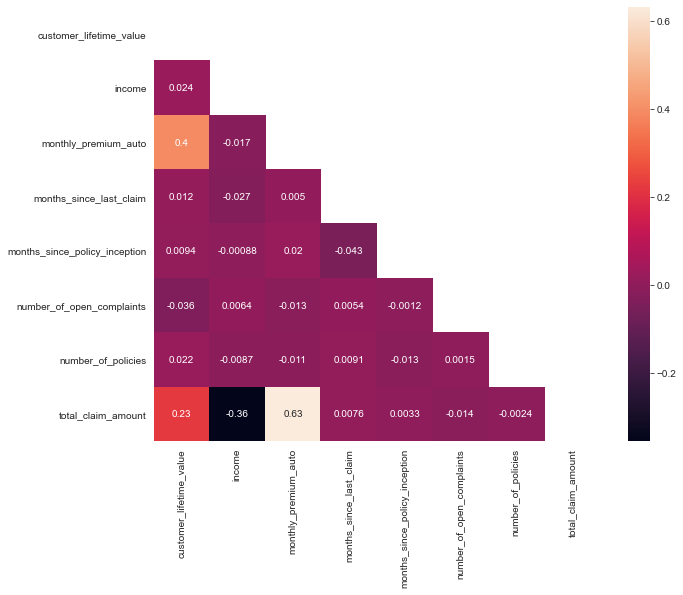

In [40]:
correlations_matrix = numerical.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


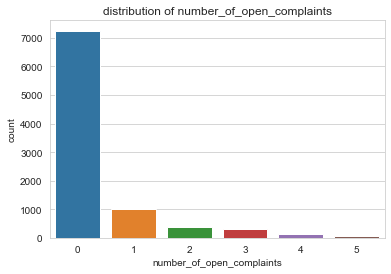

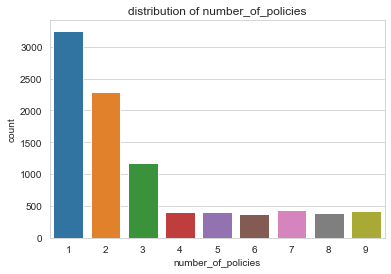

In [46]:
def plot_discrete(df):
    for i in df.columns:
        plt.figure()
        plt.title("distribution of {}".format(i))
        sns.countplot(x=i, data=df)
        
plot_discrete(discrete_df)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='education'>

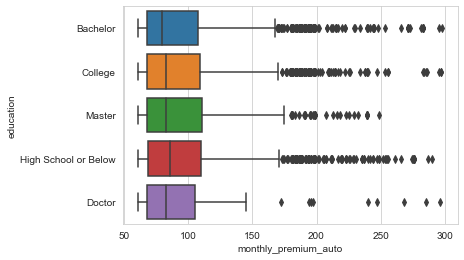

In [55]:
sns.boxplot(x='monthly_premium_auto', y= 'education', data=customer_df)

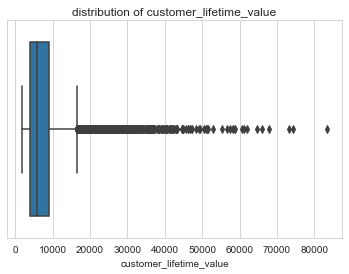

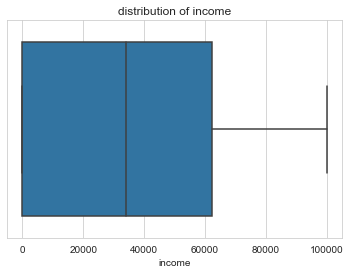

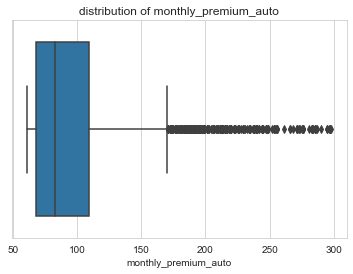

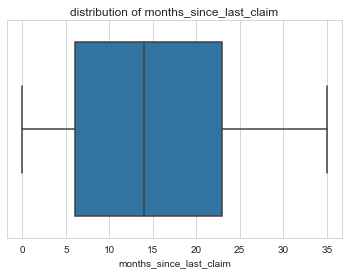

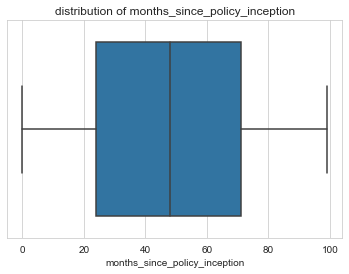

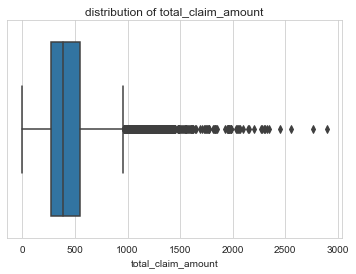

In [51]:
def plot_continuous(df):
    for i in df.columns:
        plt.figure()
        plt.title("distribution of {}".format(i))
        sns.boxplot(x=i, data=df)
        
plot_continuos(continuous_df)

**number_of_open_complaint**: it would be good to cluster in open complaint and not open complaint due to the big amount of not open complaints vs the other values.

**number_of_policies**: the majority of people has max. 3 policies. We could group into: 1,2,3,more than 3.

**customer lifetime value**: we have lots of outliers. We should scale it or make another dataset with the outliers.
The median is below 10000. It is positive skewed so, the median is higher than the mean.

**income**: the minimum and the Q1 are the same. There is a negative skew, the mean is higher than the median.
No outliers.

**monthly_premium_auto**: There are a lot of outliers. If we compare this feature with education we see 'Doctors' have
less outliers its last quartile is shorter --> sns.boxplot(x='monthly_premium_auto', y='education',data=customer_df )

**months_since_last_claim**: on average people claim a little over a year. It doesn't have outliers. 3 quarters of people claim up to 2 years or less.

**months_since_policy_inception**: it seems to follow a normal distribution. On average, the median length of months for taking out policy is under 50.

**total_claim_amount**: most people claim less than $1000, although we have a lot of outliers that tells us we should scale the colum or make another dataset with the outliers.

